In [1]:
from clusterviz import datasets

# Loading the Iris dataset, which is a classic dataset in machine learning.
# It contains 150 samples of iris flowers with 4 features each
X, y, features = datasets.load_iris()
print("Iris X shape:", X.shape)    
print("Iris y shape:", y.shape)    
print("Features:", features)       

 
# A "blobs" dataset is a synthetic dataset used for clustering experiments.
# Points are generated around specified centers, forming groups (clusters).

Xblob, yblob, fblob = datasets.make_blobs_dataset(n_samples=100, centers=3, n_features=2)
print("Blobs X shape:", Xblob.shape)   
print("Blobs y shape:", yblob.shape)  # Cluster labels (0,1,2)
print("Blobs features:", fblob)       

# 3. Loading a synthetic customer data

df = datasets.load_customer_data(n_customers=50)
print("Customer data columns:", df.columns.tolist())
print("First 5 rows:\n", df.head())


Iris X shape: (150, 4)
Iris y shape: (150,)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Blobs X shape: (100, 2)
Blobs y shape: (100,)
Blobs features: ['feature_1', 'feature_2']
Customer data columns: ['age', 'annual_income', 'spending_score', 'purchase_frequency']
First 5 rows:
          age  annual_income  spending_score  purchase_frequency
0  38.656605   55782.387974              46                   3
1  22.520191   62625.764517              27                   4
2  44.005414   20856.883603              77                   6
3  46.286777   43606.575673              97                   5
4  11.587578   40592.546914              27                   3


In [2]:
import pandas as pd
from clusterviz.preprocessing import Preprocessor

df = pd.DataFrame({
    "age": [20, 25, 30, 35, 40],
    "income": [30000, 35000, 40000, 45000, 50000],
    "spending": [100, 200, 300, 400, 500]
})

pre = Preprocessor()
X_trans = pre.fit_transform(df, scale=True, pca_components=2)

print("Original shape:", df.shape)
print("Transformed shape:", X_trans.shape)
print("Explained variance ratio:", pre.get_explained_variance_ratio())


Original shape: (5, 3)
Transformed shape: (5, 2)
Explained variance ratio: [1.00000000e+00 9.86076132e-33]


In [8]:
from clusterviz.preprocessing import Preprocessor

# Creating Preprocessor object
pre = Preprocessor()
# Fitting and transforming the data (scaling only, no PCA)
# Scaling is very crucial for distance-based clustering algorithms 
# (like DBSCAN or k-means) that we are going to perform later, to ensure 
# that no feature dominates because of its scale.
X_scaled = pre.fit_transform(X, scale=True, pca_components=None)

# Checking the transformed data
print("Scaled data shape:", X_scaled.shape)
print("Mean of each feature (should be around 0):", X_scaled.mean(axis=0))
print("Std of each feature (should be around 1):", X_scaled.std(axis=0))


# PCA finds new axes (principal components) capturing the most variance.
# Here, we reduce from 4 features to 2 components for easy visualization and faster clustering.
# explained_variance_ratio function tells how much of the original variance each principal 
# component captures.
# Fitting and transforming data with PCA to reduce to 2 components
X_pca = pre.fit_transform(X, scale=True, pca_components=2)

# Checking the PCA output
print("PCA transformed shape:", X_pca.shape)
print("Explained variance ratio:", pre.get_explained_variance_ratio())

# Visualizing the first few rows
pd.DataFrame(X_pca, columns=["PC1", "PC2"]).head()



Scaled data shape: (150, 4)
Mean of each feature (should be ~0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std of each feature (should be ~1): [1. 1. 1. 1.]
PCA transformed shape: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
# PC1 captures around 73% of the variance, PC2 captures around 23%. Together they capture 96% of the 
# total variance. Most of the original information is retained with fewer dimensions, which speeds up 
# clustering and helps visualization.

# Aboove are printed the first 5 rows of the PCA-transformed data.
# Each row is now in the principal component space instead of original feature space.

In [9]:
# Supposing we have now a new data (test or additional samples)
X_new = X[:5, :]  # just taking first 5 samples as example

# Then we transform them using the already fitted scaler + PCA
# The transform() function is used on new/unseen data to ensure consistent preprocessing
# with training data.

X_new_transformed = pre.transform(X_new)
print("Transformed new data shape:", X_new_transformed.shape)

Transformed new data shape: (5, 2)


In [10]:
# The new/unseen data are now transformed using the fitted scaler + PCA.
# This ensures consistency in preprocessing when applying clustering to new samples.

Original shape: (150, 2)
Feature names: ['feature_1', 'feature_2']
Scaled shape: (150, 2)
First 5 rows:
 [[-0.1924115   1.40481224]
 [-0.36021104  1.11847482]
 [-1.03906496 -1.35819539]
 [ 1.70221213  0.1164726 ]
 [-0.99018173 -1.184533  ]]
Number of clusters found: 3
Number of noise points: 0
First 10 labels: [0 0 1 2 1 2 0 0 1 2]


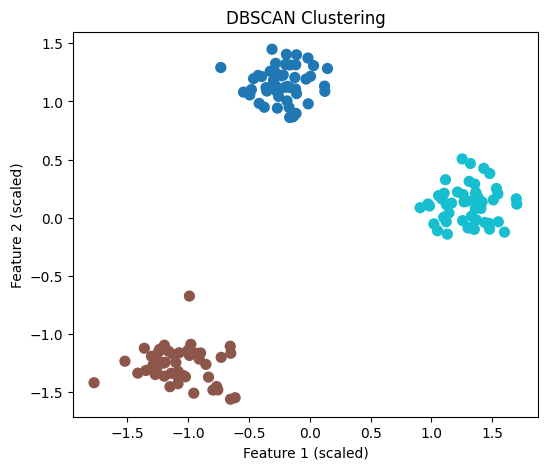

In [11]:
# Tutorial: Preprocessing + DBSCAN Clustering
import numpy as np
import pandas as pd
from clusterviz.datasets import make_blobs_dataset
from clusterviz.preprocessing import Preprocessor
from clusterviz.clusterer import Clusterer

# -----------------------------
# 1. Load synthetic dataset
# -----------------------------
# Create a blobs dataset: points grouped around 3 centers, 2 features
X, _, feature_names = make_blobs_dataset(n_samples=150, centers=3, n_features=2)
print("Original shape:", X.shape)
print("Feature names:", feature_names[:2])

# -----------------------------
# 2. Preprocess the data
# -----------------------------
# Initialize preprocessor
preprocessor = Preprocessor()

# Scale features (mean=0, std=1)
# Optional: PCA can be added if dimensionality reduction is needed
X_scaled = preprocessor.fit_transform(X, scale=True, pca_components=None)
print("Scaled shape:", X_scaled.shape)
print("First 5 rows:\n", X_scaled[:5])

# -----------------------------
# 3. Fit DBSCAN
# -----------------------------
clusterer = Clusterer()

# DBSCAN parameters:
# eps: max distance for points to be considered neighbors
# min_samples: minimum points in neighborhood for a core point
dbscan_result = clusterer.fit_dbscan(X_scaled, eps=0.5, min_samples=5)

# -----------------------------
# 4. Explore results
# -----------------------------
labels = dbscan_result['labels']
n_clusters = dbscan_result['n_clusters']
n_noise = dbscan_result['n_noise']

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print("First 10 labels:", labels[:10])

# -----------------------------
# 5. Optional: Visualize clusters
# -----------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='tab10', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
